# Mixing time for an inhomogeneous system
### Group: Ana Julia Antunes Souza and Cecilia Pires de Oliveira Capela


## Introduction
   In this TP, we used the Python language as a tool to study __molecular dynamics simulation__. That means that we studied the dynamics of "particles" that represented molecules (or atoms). We considered that these particles were bound to a box of size LxL and we studied the interactions between pairs of particles, as well as between the particles and the wall.  
    
   We considered the particles as two-dimensional "hard disks" with a radius σ as a simplification for the model. As a result, it is easier to calculate the positions, trajectories and even to simulate the physical situation. 
   

## Base model of the particles

### Initial system
To create the initial system, we defined the number of particles in the system (N), the radius of the particles (sigma) and the size of the box (L). The particles were initialized with random positions inside the box, considering the positions between *sigma* and *L-sigma* in both directions so as to consider the physical dimension of the particles. 

The result of the initial system is presented in the following image:
<div>
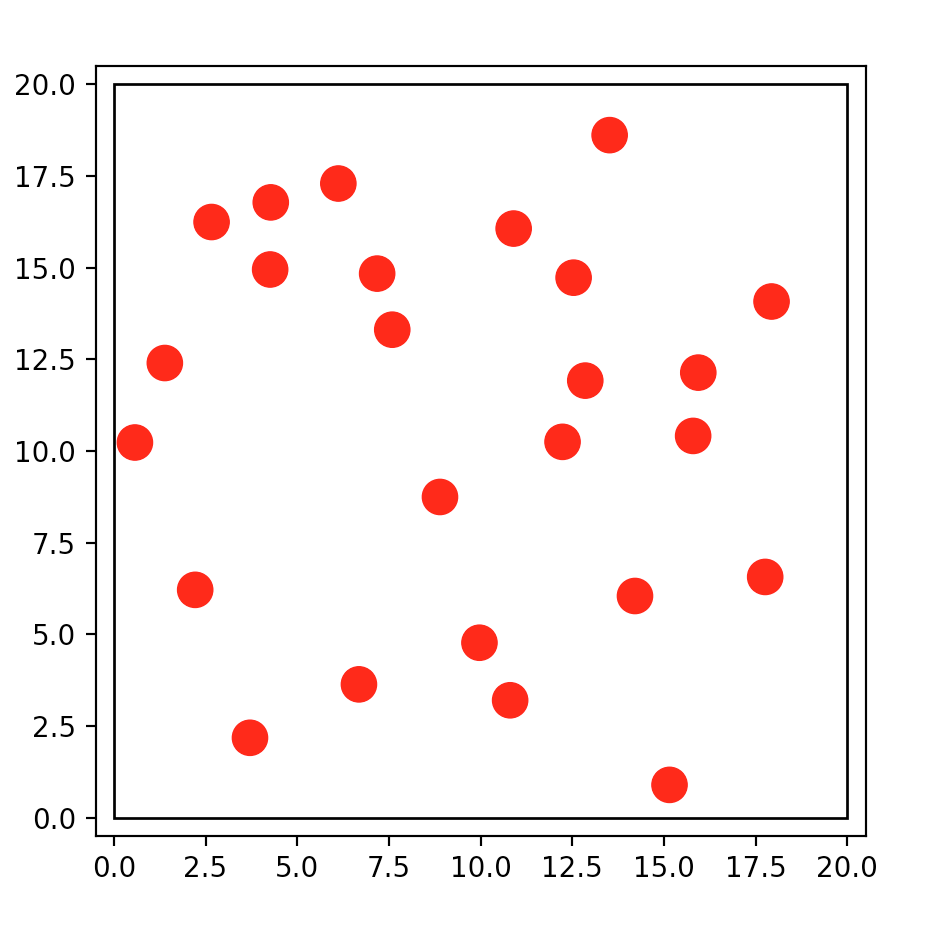
</div>

### Initial velocities
The velocities were defined as random velocities using np.random.rand(). 

## Collisions 
 
### Collisions with the wall
The function `_wall_time( )` calculates for each step the first collision time between a particle and any wall. It analyses based on the velocity and the distance to any given wall all of the times that will take for the particles to collide with a wall and it returns the smallest time of collision, that particle that will collide and the direction of that wall (vertical or horizontal).   

### Collisions with other particles

Similarly, the function `_pair_time()` accounts for the first collision between any pairs of particles. Firstly, the pairs are indexed using the numpy function triu_indices. That way, it is possible to calculate the distance and relative velocity of any pair of particles i and j. 
The collision is the moment where the distance between two particles is equal to 2 times the radius (2 sigma). Thus, it is possible to say:

$$ (2σ)^2 = (r_{init,x}+v_{init,x}*t_{collision})^2 + (r_{init,y}+v_{init,y}*t_{collision})^2 $$

where r is the relative position and v the relative velocity of the particles.
Afterwards, the time of the collision can be isolated, which comes down to solving a second degree equation:

$$ t_{collision} = \frac{-b -\sqrt{\Delta}}{2a}$$

with:

$ a = v_{init,x}^2 + v_{init,y}^2 $

$ b = 2*(r_{init,x}*v_{init,x}+r_{init,y}*v_{init,y}) $

$ c = r_{init,x}^2 + r_{init,y}^2 - 4*\sigma^2 $

That way, the collision time will only be calculated if:

$\bullet$ Delta is positive, to ensure the solution is real

$\bullet$ b is negative, that is, particles are getting closer

$\bullet$ c is positive, so to only consider cases where the distance between particles is greater than 2\sigma

If the conditions are not met, np.inf is used in order to associate an infinite value to the collision time of particles i and j. That way, the function returns the minimum time for the collision of a pair of particles, as well as their indexes i and j.

### Updating velocities

Now, collision times are already calculated and the function `md_step()` will be used in order to update velocities succeding a collision. Firstly, it is evaluated, in a boucle while, if either the minimum collision time between a particle and the wall or between two particles is inferior to the sampling time. If that's the case, at least one collision will happen within the sample time. Next, it is analysed if the next collision (the one with the smallest collision time) will be with the wall or with another particle, and positions and velocities are updated accordingly.

As a simplification, all collisions were considered to be perfectly ellastic. That means that when a particle collided with the wall, the particle returned with negative velocity of the opposite component as the direction of the wall it collided. For example, if the particle collided with one of the vertical walls, the x-component of the velocity would change sign. 

For the collisions between particles, this simplification implies the conservation of kinetic energy. Combined with the momentum conservation and considering particles of equal mass, the velocities of the particles are given by:

$$\textbf{v}_1' =\textbf{v}_1 -\hat{ \textbf{r}} (\hat {\textbf{ r}}  \cdot ( \textbf{v}_1 -\textbf{ v}_2) )$$,  $$\textbf{v}_2' =\textbf{v}_2 +\hat{ \textbf{r}} (\hat {\textbf{ r}}  \cdot ( \textbf{v}_1 -\textbf{ v}_2) )$$

where $\hat{\textbf{r}}$ is a unit vector in the direction of the vector joining the centres of the particles.

Then, the collision time is added to a variable called "current time". In this way, the boucle while will be valid as long as the next minimum collision time is inferior to the sampling time plus the ellapsed time (current time).
Lastly, it is necessary to update the collision times by calling the functions `_wall_time()` and `_pair_time()`, as well as the positions of the particles (from the last collision - that happened in "current time" - to the end of the sampling time).


### Pressure



In [ ]:

            
            if w_time < p_time:
                self.position += w_time * self._velocity
                current_time += w_time
                self._velocity[particle,direction] = -self._velocity[particle,direction]
                pressure += 2*abs(self._velocity[particle,direction])/(4*self.L*self._sample_time)
            else:
                self.position += p_time * self._velocity
                current_time += p_time
                scalar = (r*(self._velocity[part_i,:] - self._velocity[part_j,:])).sum()
                velocity_i = self._velocity[part_i,:] - r*scalar
                velocity_j = self._velocity[part_j,:] + r*scalar
                self._velocity[part_i,:] = velocity_i
                self._velocity[part_j,:] = velocity_j
                print(self._velocity[part_i,:])
            
            w_time, particle, direction = self._wall_time()
            p_time, part_i, part_j, r = self._pair_time()
            min_time = min(w_time,p_time)
           
        
        self.position += (self._sample_time - current_time) * self._velocity
        
        

        print(pressure)
        return pressure